In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

# CSV 파일 읽기
df1 = pd.read_csv('Data/train.csv')
df2 = pd.read_csv('Data/test.csv')

# location, street, block 컬럼 합치기
df1['address'] = df1['location'] + '/' + df1['street'] + '/' + df1['block']
df2['address'] = df2['location'] + '/' + df2['street'] + '/' + df2['block']

# 결과 확인
print(df1[['location', 'street', 'block', 'address']].head())
print(df2[['location', 'street', 'block', 'address']].head())

# 합친 결과를 새로운 CSV 파일로 저장
df1.to_csv('Data/train_merged_address.csv', index=False)
df2.to_csv('Data/test_merged_address.csv', index=False)

#데이터 불러오기
try:
    data = pd.read_csv('Data/test_merged_address.csv', encoding='utf-8')
    train = pd.read_csv('Data/train_merged_address.csv', encoding='utf-8')
except UnicodeDecodeError:
    #UTF-8로 실패한 경우 CP949로 재시도
    data = pd.read_csv('Data/test_merged_address.csv', encoding='cp949')
    train = pd.read_csv('Data/train_merged_address.csv', encoding='cp949')  

   location               street block                         address
0   Raleigh       Agawan Court    107D     Raleigh/Agawan Court  /107D
1    Fresno              Cleo St   678              Fresno/Cleo St/678
2    Tucson  E Pleasant View Way     5    Tucson/E Pleasant View Way/5
3    Austin       Park Hollow Ln   326       Austin/Park Hollow Ln/326
4  Honolulu    Ala Puawa Place     794  Honolulu/Ala Puawa Place  /794
  location                street block                          address
0   Austin         Governors Row   174         Austin/Governors Row/174
1   Austin          Stonleigh Pl   218          Austin/Stonleigh Pl/218
2   Austin  Palisades Point Cove   443  Austin/Palisades Point Cove/443
3   Austin  Palisades Point Cove   443  Austin/Palisades Point Cove/443
4   Austin  Palisades Point Cove   435  Austin/Palisades Point Cove/435


In [3]:
data.head()
train.head()
data.tail()
train.tail()

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price,address
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0,Omaha/Sandra Ln/483
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0,Omaha/Atkin Rd/615
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0,Boston/Kempton Street /390
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0,Fresno/Magnolia Dale Dr/968
271720,225691,2007-10,Milwaukee,EXECUTIVE,341,W Fond du Lac Avenue,04 TO 06,143.0,C,1993,450000.0,Milwaukee/W Fond du Lac Avenue /341


In [4]:
train.describe()
data.describe()

,house_id,area_sqm,commence_date
count,67930.000000,67930.000000,67930.000000
mean,169986.021110,96.621437,1987.961549
std,98155.065152,25.571152,9.114878
min,2.000000,29.000000,1966.000000
25%,84505.250000,73.000000,1981.000000
50%,170184.000000,100.000000,1987.000000
75%,255262.250000,115.000000,1997.000000
max,339644.000000,266.000000,2012.000000


In [5]:
train.isna().sum()
data.isna().sum()

house_id         0
date             0
location         0
type             0
block            0
street           0
storey_range     0
area_sqm         0
flat_model       0
commence_date    0
address          0
dtype: int64

In [6]:
tmp = {}
tmp['date'] = pd.to_datetime(train['date'])
train['year'] = tmp['date'].dt.year
train['month'] = tmp['date'].dt.month

train.drop('date', axis=1, inplace=True)

# location, street, block 컬럼 삭제 (address 컬럼으로 대체)
train.drop(['location', 'street', 'block'], axis=1, inplace=True)

In [7]:
#정규화
train = pd.get_dummies(train, columns=['type', 'storey_range', 'flat_model', 'address'])
numerical_features = ['area_sqm']

scaler = MinMaxScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

In [8]:
X = train.drop('price', axis = 1)
y = train['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [12]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
train

,house_id,area_sqm,commence_date,price,year,month,type_1 ROOM,type_2 ROOM,type_3 ROOM,type_4 ROOM,...,address_Washington/Western Avenue NW /26C,address_Washington/Western Avenue NW /26D,address_Washington/Western Avenue NW /27A,address_Washington/Western Avenue NW /27B,address_Washington/Westover Avenue SW /77,address_Washington/Westover Avenue SW /78,address_Washington/Woodley Road NW /34,address_Washington/Woodley Road NW /41,address_Washington/Woodley Road NW /42,address_Washington/Woodley Road NW /45
0,199577,0.325397,2003,313000.0,2006,9,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,217021,0.142857,1988,167000.0,2007,6,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,308062,0.253968,1976,430000.0,2010,9,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,212465,0.253968,1977,303800.0,2007,4,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,60654,0.293651,1998,212000.0,2001,10,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,0.297619,1989,232000.0,2003,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
271717,28297,0.420635,1996,428000.0,2000,11,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271718,321995,0.357143,2004,548888.0,2011,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271719,308162,0.246032,1999,360000.0,2010,9,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [14]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print(f'Train MAE: {train_mae}, Train R^2: {train_r2}')
print(f'Test MAE: {test_mae}, Test R^2: {test_r2}')

Train MAE: 7809.988542726887, Train R^2: 0.987776207102307
Test MAE: 20911.752685735573, Test R^2: 0.9145270562997727


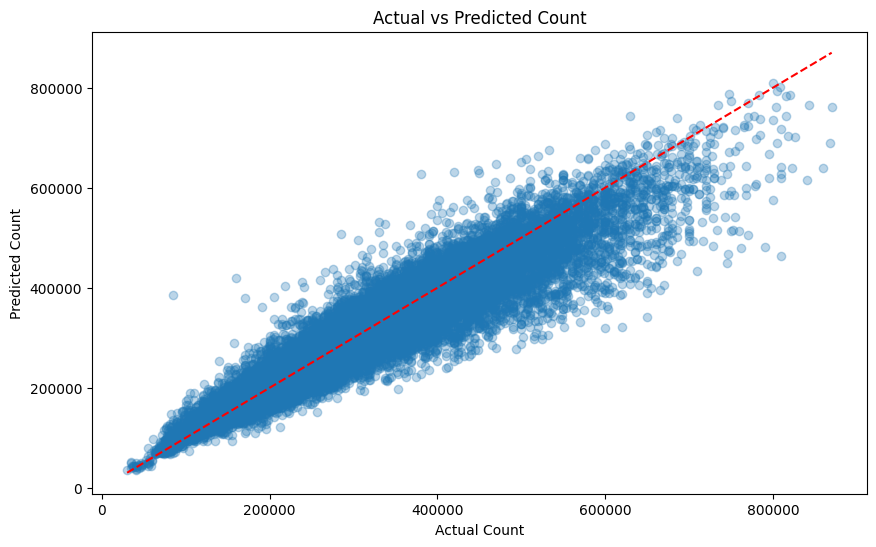

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
plt.show()